In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer

c:\Users\kar\anaconda3\envs\asdfs\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Note: you may need to restart the kernel to use updated packages.


In [2]:
file_path = r"F:\Karthik-Backup2023\olddesktop-2022-23\Programming\Machine Learning\love\shaky\text.txt"
text = open(file_path, 'r', encoding='utf-8').read()
text = text.lower()

chars = sorted(list(set(text)))
ints = dict((c, i) for i, c in enumerate(chars))
n_chars = len(text)
n_vocab = len(chars)

In [3]:
window = 100
dataX = []
dataY = []
for i in range(0, n_chars - window, 1):
    text_in = text[i:i+window]
    text_out = text[i+100]
    # numericalizes
    dataX.append([ints[char] for char in text_in])
    dataY.append(ints[text_out])
len(dataX)

1115293

In [4]:
# 100 x 1115283
# sample, timesteps, features
X = torch.tensor(dataX, dtype=torch.float32).reshape(len(dataX), window, 1)
# normalize
X = X / float(n_vocab)
y = torch.tensor(dataY)
X.shape, y.shape

(torch.Size([1115293, 100, 1]), torch.Size([1115293]))

In [5]:
class LSTM(nn.Module):
    def __init__(self):
        super().__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=256, num_layers=1, batch_first=True)
        self.dropout = nn.Dropout(0.2)
        self.linear = nn.Linear(256, n_vocab)
    def forward(self, x):
        x, _ = self.lstm(x)
        # take only the last output
        x = x[:, -1, :]
        x = self.linear(self.dropout(x))
        return x

In [6]:
best_model = None
model = LSTM()
criterion = nn.CrossEntropyLoss(reduction="sum")
optimizer = torch.optim.Adam(model.parameters())
loader = DataLoader(torch.utils.data.TensorDataset(X, y), shuffle=True, batch_size=32)

In [7]:
epochs = 50
train_losses = []
best_loss = np.inf

for epoch in range(epochs):
    model.train()
    running_loss = 0
    for X_batch, y_batch in loader:
        pred = model(X_batch)
        loss = criterion(pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    model.eval()
    loss = 0
    with torch.no_grad():
        for X_batch, y_batch in loader:
            pred = model(X_batch)
            loss += criterion(pred, y_batch)
        if(loss < best_loss):
            best_loss = loss
            best_model = model.state_dict()
        print("-" * 10)
        print(f"EPOCH {epoch+1}")
        print(f"Loss {loss}")

----------
EPOCH 1
Loss 2613242.0
----------
EPOCH 2
Loss 2413668.75
----------
EPOCH 3
Loss 2281175.0
----------
EPOCH 4
Loss 2200597.75
----------
EPOCH 5
Loss 2129610.0
----------
EPOCH 6
Loss 2081087.875
----------
EPOCH 7
Loss 2047398.0
----------
EPOCH 8
Loss 2009556.0
----------
EPOCH 9
Loss 1975712.875
----------
EPOCH 10
Loss 1961371.0
----------
EPOCH 11
Loss 1938013.5
----------
EPOCH 12
Loss 1925282.625
----------
EPOCH 13
Loss 1900348.5
----------
EPOCH 14
Loss 1887944.125
----------
EPOCH 15
Loss 1876383.0
----------
EPOCH 16
Loss 1865819.625
----------
EPOCH 17
Loss 1857889.375
----------
EPOCH 18
Loss 1844962.25
----------
EPOCH 19
Loss 1832668.625
----------
EPOCH 20
Loss 1828721.625
----------
EPOCH 21
Loss 1819799.75
----------
EPOCH 22
Loss 1813673.125
----------
EPOCH 23
Loss 1808339.75
----------
EPOCH 24
Loss 1794786.5
----------
EPOCH 25
Loss 1794671.125
----------
EPOCH 26
Loss 1785613.5
----------
EPOCH 27
Loss 1776756.125
----------
EPOCH 28
Loss 1775286.875


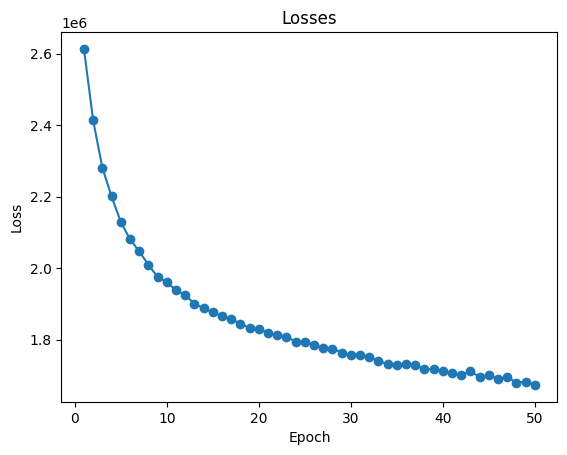

In [9]:
lines = """EPOCH 1
Loss 2613242.0
----------
EPOCH 2
Loss 2413668.75
----------
EPOCH 3
Loss 2281175.0
----------
EPOCH 4
Loss 2200597.75
----------
EPOCH 5
Loss 2129610.0
----------
EPOCH 6
Loss 2081087.875
----------
EPOCH 7
Loss 2047398.0
----------
EPOCH 8
Loss 2009556.0
----------
EPOCH 9
Loss 1975712.875
----------
EPOCH 10
Loss 1961371.0
----------
EPOCH 11
Loss 1938013.5
----------
EPOCH 12
Loss 1925282.625
----------
EPOCH 13
Loss 1900348.5
----------
EPOCH 14
Loss 1887944.125
----------
EPOCH 15
Loss 1876383.0
----------
EPOCH 16
Loss 1865819.625
----------
EPOCH 17
Loss 1857889.375
----------
EPOCH 18
Loss 1844962.25
----------
EPOCH 19
Loss 1832668.625
----------
EPOCH 20
Loss 1828721.625
----------
EPOCH 21
Loss 1819799.75
----------
EPOCH 22
Loss 1813673.125
----------
EPOCH 23
Loss 1808339.75
----------
EPOCH 24
Loss 1794786.5
----------
EPOCH 25
Loss 1794671.125
----------
EPOCH 26
Loss 1785613.5
----------
EPOCH 27
Loss 1776756.125
----------
EPOCH 28
Loss 1775286.875
----------
EPOCH 29
Loss 1764216.625
----------
EPOCH 30
Loss 1757035.875
----------
EPOCH 31
Loss 1757848.75
----------
EPOCH 32
Loss 1750710.75
----------
EPOCH 33
Loss 1741775.875
----------
EPOCH 34
Loss 1731075.5
----------
EPOCH 35
Loss 1729992.375
----------
EPOCH 36
Loss 1732913.0
----------
EPOCH 37
Loss 1728111.625
----------
EPOCH 38
Loss 1717253.125
----------
EPOCH 39
Loss 1717608.5
----------
EPOCH 40
Loss 1711971.75
----------
EPOCH 41
Loss 1705606.625
----------
EPOCH 42
Loss 1701810.625
----------
EPOCH 43
Loss 1711090.25
----------
EPOCH 44
Loss 1695826.5
----------
EPOCH 45
Loss 1701011.25
----------
EPOCH 46
Loss 1689647.375
----------
EPOCH 47
Loss 1695575.25
----------
EPOCH 48
Loss 1679984.625
----------
EPOCH 49
Loss 1682744.375
----------
EPOCH 50
Loss 1673543.625"""
losses = []
for line in lines.splitlines():
    if "Loss" in line:
        losses.append(float(line.split()[1])) 
x = np.arange(1, 51)
plt.plot(x, losses, 'o-')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Losses')
plt.show()

In [25]:
start = np.random.randint(0, len(text)-window)
prompt = text[start:start+window]
pattern = [ints[c] for c in prompt]
# print(pattern)
model.eval()
# print(ints)
print('Prompt: "%s"' % prompt)
print("--" * 10)
with torch.no_grad():
    for i in range(1000):
        # reshape so it can be tensor
        x = np.reshape(pattern, (1, len(pattern), 1)) / float(n_vocab)
        x = torch.tensor(x, dtype=torch.float32)
        pred = model(x)
        # logit to character
        index = int(pred.argmax())
        # print(index)
        result = list(ints.keys())[list(ints.values()).index(index)]
        print(result, end="")
        pattern.append(index)
        pattern = pattern[1:]

Prompt: "d when some of you should say,
i was too strict to make mine own away;
but you gave leave to my unwi"
--------------------
rle thanks,
and there is not the soul that wese the fertter
of the soul that i that shall be so to thee
and then the son of the soul that i have sounded
the wirdom of the soul that wese the son,
and there is not the servine of the wirhss,
and there is not the servine of the wirhss,
and there is not the servine of the wir,
and there is not the servine of the wirhss,
and there is not the servine of the wirhss,
and there is not the servine of the wir,
and there is not the servine of the wirhss,
and there is not the servine of the wirhss,
and there is not the servine of the wir,
and there is not the servine of the wirhss,
and there is not the servine of the wirhss,
and there is not the servine of the wir,
and there is not the servine of the wirhss,
and there is not the servine of the wirhss,
and there is not the servine of the wir,
and there is not the servine